In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from scipy.cluster.hierarchy import dendrogram

In [2]:
def get_data_from_df(df):
    return {row[1]:(row[2:-1], 0, "", "") for row in df.to_numpy()}

In [3]:
df = pd.read_csv("data_lab_1.csv", delimiter=";", decimal=",")
df = df[df["num"]!=5]
data = get_data_from_df(df)

In [6]:
df_normolized = df.copy()
features = ["X1", "X2", "X3", "X4"]
df_normolized[features] = (df_normolized[features] - df_normolized[features].mean())/df_normolized[features].std()

data_norm = get_data_from_df(df_normolized)

In [19]:
nearest_neighbour = lambda x: min(x)

farest_neighbour = lambda x: max(x)

ward_method = lambda x: sum(x**2)

In [13]:
euclidean_distance = lambda x, y : (x - y)**2
city_block_distance = lambda x, y : np.abs(x - y)

In [14]:
def hierarchical_tree(data, dist_chooser, dist_calc = euclidean_distance):

    all_keys = {key:key_ind for key_ind, key in enumerate(data.keys())}
    ret = []
    ind = 0

    layer_clusters = data.copy()
    while len(layer_clusters) > 1:
        
        dist_matrix = np.zeros([len(layer_clusters), len(layer_clusters)]) + np.inf
        key_list = list(layer_clusters.keys())
        for key_index in range(len(key_list)):
            for i in range(key_index):
                dist_matrix[key_index][i] = dist_chooser(dist_calc(layer_clusters[key_list[key_index]][0], layer_clusters[key_list[i]][0]))

        min_val = dist_matrix.min()
        new_cluster_ind = np.argmin(dist_matrix)

        new_cluster_par1 = key_list[new_cluster_ind//len(key_list)]
        new_cluster_par2 = key_list[new_cluster_ind%len(key_list)]

        new_cluster_value = (
            np.mean([layer_clusters[new_cluster_par2][0],layer_clusters[new_cluster_par1][0]], axis = 0),
            min_val + max(layer_clusters[new_cluster_par1][1], layer_clusters[new_cluster_par2][1]),
            new_cluster_par1,
            new_cluster_par2
        )

        layer_clusters.pop(new_cluster_par1)
        layer_clusters.pop(new_cluster_par2)

        new_clust_name = f"cluster{ind}"
        all_keys[new_clust_name] = len(all_keys)

        layer_clusters[new_clust_name] = new_cluster_value
        ret += [[new_clust_name, new_cluster_value]]
        ind += 1

    return  all_keys, ret

def generate_links(keys, clusters):
    return np.array([[keys[cl[1][2]], keys[cl[1][3]], np.cbrt(cl[1][1]), keys[cl[0]]] for cl_ind, cl in enumerate(clusters)], dtype=float)

На вохд поступает словарь стран где каждая запись имеет вид:

Ключ: Параметры, растояние между родительскими кластероами, имя первого кластера, имя второго кластера

Далее на каждом шаге итерации строится матрица вида

$$\begin{vmatrix}
\infty & \infty & \infty & 	\vdots & \infty \\
d_{1, 0} & \infty & \infty & 	\vdots & \infty \\
d_{2, 0} & d_{2, 1} & \infty & 	\vdots & \infty \\
\cdots & \cdots & \cdots & 	\ddots & \cdots \\
d_{n, 0} & d_{n, 1} & d_{n, 2} & 	\vdots & \infty
\end{vmatrix}$$

Где $d_{i,j}$ растояние между кластерами i и j соответсвтенно

#  Выполненне задач

## Задание 1

    Данные не нормированны

    Растояние между кластерами - Евклидово расстояние

    Правила объединения или связи - метод ближайшего соседа

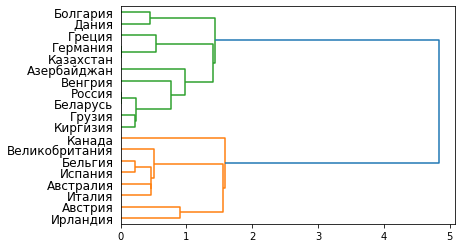

In [15]:
links = generate_links(*hierarchical_tree(data, nearest_neighbour))
dn = dendrogram(links, labels=list(data.keys()),orientation='right')
plt.show()

## Задание 2

    Данные нормированны

    Растояние между кластерами - Евклидово расстояние

    Правила объединения или связи - метод ближайшего соседа

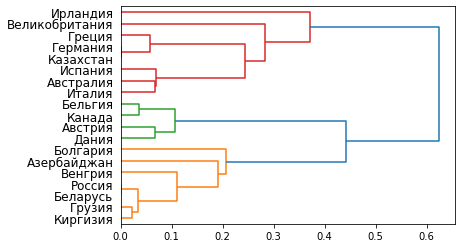

In [16]:
links = generate_links(*hierarchical_tree(data_norm, nearest_neighbour))
dn = dendrogram(links, labels=list(data_norm.keys()),orientation='right')
plt.show()

## Задание 3

    Данные не нормированны

    Растояние между кластерами - Евклидово расстояние

    Правила объединения или связи - метод наиболее удаленных соседей

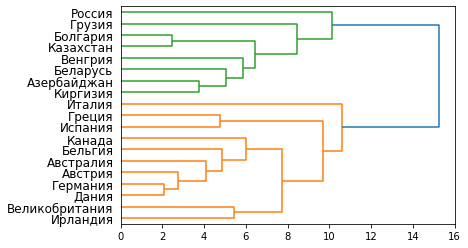

In [17]:
links = generate_links(*hierarchical_tree(data, farest_neighbour))
dn = dendrogram(links, labels=list(data.keys()),orientation='right')
plt.show()

## Задание 4

    Данные не нормированны

    Растояние между кластерами - Расстояние городских кварталов

    Правила объединения или связи - Метод Варда

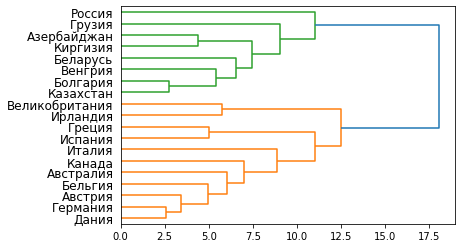

In [20]:
links = generate_links(*hierarchical_tree(data, ward_method, city_block_distance))
dn = dendrogram(links, labels=list(data.keys()),orientation='right')
plt.show()